In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import pandas as pd

In [4]:
X = pd.read_csv("/home/dsi/zuckerm1/r_files/All_Samples/data_fs_600.csv", index_col = 0)

In [5]:
X.head(2)

,CAVNTNAGKSTF,CAVNTGGFKTIF,CAVNTGNQFYF,CAENSGGSNYKLTF,CAVRDGDYKLSF,CAASGGSNYKLTF,CAVNQAGTALIF,CAVNSGGYQKVTF,CAENTGGFKTIF,CAVNRDDKIIF,...,CASSLVNEQFF,CASSTSTDTQYF,CASSVGGNTEAFF,CASSPGYEQYF,CAVSKAAGNKLTF,CALAGGTSYGKLTF,CASSLGTSTDTQYF,CAVPNDYKLSF,CAVVDSNYQLIW,y
1_A_B_H,0.000081,0.000121,0.00004,0.000161,0.000403,0.00000,0.000081,0.00004,0.00004,0.000000,...,0.0,0.000000,0.0,0.000161,0.0,0.0,0.0,0.0,0.0,0
1_A_B_OC,0.000000,0.000121,0.00000,0.000040,0.000282,0.00004,0.000040,0.00000,0.00000,0.000081,...,0.0,0.000081,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1


In [6]:
X.shape

(95, 601)

In [ ]:
from atom import ATOMClassifier

In [8]:
atom = ATOMClassifier(X, y="y", test_size=0.25, verbose=2, warnings=False, random_state = 1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (95, 601)
Memory: 456.89 kB
Scaled: False
Outlier values: 895 (2.1%)
-------------------------------------
Train set size: 72
Test set size: 23
-------------------------------------
|   |    dataset |      train |       test |
| - | ---------- | ---------- | ---------- |
| 0 |   49 (1.1) |   37 (1.1) |   12 (1.1) |
| 1 |   46 (1.0) |   35 (1.0) |   11 (1.0) |



In [9]:
atom.classes

,dataset,train,test
0,49,37,12
1,46,35,11


1. Select From Model XGB estimator

In [10]:
atom.branch = "sfm_xgb_10_from_master"

New branch sfm_xgb_10 successfully created.


In [11]:
atom.feature_selection(strategy="SFM", solver="XGB", n_features=10, random_state=0)

Fitting FeatureSelector...
Performing feature selection ...
 --> The XGBClassifier estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CAVNRDDKIIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAASNTGNQFYF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVSGGSNYKLTF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAENAGGTSYGKLTF.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping feature CAVKTSYDKVIF.
   >>> Dropping feature 

In [12]:
atom.features

['CVVSDRGSTLGRLYF',
 'CAVNFGNEKLTF',
 'CASSLGGNTEAFF',
 'CAVNNAGNMLTF',
 'CAGAGGTSYGKLTF',
 'CASSLTGELFF',
 'CAVRDSNYQLIW',
 'CASSLGYNEQFF',
 'CASSLARNTEAFF',
 'CASSLVNEQFF']

In [14]:
atom.run(models=["GNB_xgb","LR_xgb", "lSVM_xgb", "kSVM_xgb", "Ridge_xgb", "SGD_xgb", "PA_xgb", "Perc_xgb", "LDA_xgb", "QDA_xgb", "KNN_xgb", "RNN_xgb", "AdaB_xgb", "RF_xgb", "XGB_xgb","LGB_xgb"], 
         n_calls=50,
         n_initial_points=10,
         metric="AUC",
         n_bootstrap=5)

# runtime: 64 min


Training ========================= >>
Models: GNB_xgb, LR_xgb, lSVM_xgb, kSVM_xgb, Ridge_xgb, SGD_xgb, PA_xgb, Perc_xgb, LDA_xgb, QDA_xgb, KNN_xgb, RNN_xgb, AdaB_xgb, RF_xgb, XGB_xgb, LGB_xgb
Metric: roc_auc


Results for Gaussian Naive Bayes:
Fit ---------------------------------------------
Train evaluation --> roc_auc: 0.9243
Test evaluation --> roc_auc: 0.7197
Time elapsed: 0.020s
Bootstrap ---------------------------------------
Evaluation --> roc_auc: 0.7061 ± 0.0337
Time elapsed: 0.055s
-------------------------------------------------
Total time: 0.076s


Running BO for Logistic Regression...
| call             | penalty |       C |  solver | max_iter | l1_ratio | roc_auc | best_roc_auc |    time | total_time |
| ---------------- | ------- | ------- | ------- | -------- | -------- | ------- | ------------ | ------- | ---------- |
| Initial point 1  |    none |     --- | newto.. |      999 |      --- |  0.7778 |       0.7778 |  4.765s |     4.786s |
| Initial point 2  |      l2

2. Select From Model LGB estimator

In [11]:
atom.branch = "sfm_lgb_10_from_master"

New branch sfm_lgb_10 successfully created.


In [12]:
atom.feature_selection(strategy="SFM", solver="LGB", n_features=10, random_state=0)

Fitting FeatureSelector...
Performing feature selection ...
 --> The LGBMClassifier estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CAVNRDDKIIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAASNTGNQFYF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVSGGSNYKLTF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAENAGGTSYGKLTF.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping feature CAVTGNQFYF.
   >>> Dropping feature C

In [13]:
atom.features

['CVVSDRGSTLGRLYF',
 'CAVKTSYDKVIF',
 'CASSLRETQYF',
 'CASSLGYEQYF',
 'CAVMDSSYKLIF',
 'CAVNNAGNMLTF',
 'CALYNFNKFYF',
 'CALRNTGGFKTIF',
 'CASSLGPYEQYF',
 'CASSLARNTEAFF']

In [14]:
atom.run(models=["GNB_lgb","LR_lgb", "lSVM_lgb", "kSVM_lgb", "Ridge_lgb", "SGD_lgb", "PA_lgb", "Perc_lgb", "LDA_lgb", "QDA_lgb", "KNN_lgb", "RNN_lgb", "AdaB_lgb", "RF_lgb", "XGB_lgb","LGB_lgb"], 
         n_calls=50,
         n_initial_points=10,
         metric="AUC",
         n_bootstrap=5)

# runtime: 45 min


Training ========================= >>
Models: GNB_lgb, LR_lgb, lSVM_lgb, kSVM_lgb, Ridge_lgb, SGD_lgb, PA_lgb, Perc_lgb, LDA_lgb, QDA_lgb, KNN_lgb, RNN_lgb, AdaB_lgb, RF_lgb, XGB_lgb, LGB_lgb
Metric: roc_auc


Results for Gaussian Naive Bayes:
Fit ---------------------------------------------
Train evaluation --> roc_auc: 0.9459
Test evaluation --> roc_auc: 0.7576
Time elapsed: 0.059s
Bootstrap ---------------------------------------
Evaluation --> roc_auc: 0.7439 ± 0.0752
Time elapsed: 0.212s
-------------------------------------------------
Total time: 0.273s


Running BO for Logistic Regression...
| call             | penalty |       C |  solver | max_iter | l1_ratio | roc_auc | best_roc_auc |    time | total_time |
| ---------------- | ------- | ------- | ------- | -------- | -------- | ------- | ------------ | ------- | ---------- |
Finished loading model, total used 100 iterations
| Initial point 1  |    none |     --- | newto.. |      999 |      --- |  0.8642 |       0.8642 |  

3. Select From Model LR estimator

In [5]:
atom.branch = "sfm_lr_10_from_master"

New branch sfm_lr_10 successfully created.


In [6]:
atom.feature_selection(strategy="SFM", solver="LR", n_features=10, random_state=0)

Fitting FeatureSelector...
Performing feature selection ...
 --> The LogisticRegression estimator selected 10 features from the dataset.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAASGGSNYKLTF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CAVNRDDKIIF.
   >>> Dropping feature CAVDTGRRALTF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAASNTGNQFYF.
   >>> Dropping feature CASSLGETQYF.
   >>> Dropping feature CAVSGGSNYKLTF.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >>> Dropping feature CAENAGGTSYGKLTF.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAVGGSQGNLIF.
   >>> Dropping feature CAVKTSYDKVIF.
   >>> Dropping fea

In [7]:
atom.features

['CVVSDRGSTLGRLYF',
 'CAVMDSSYKLIF',
 'CAVRDQAGTALIF',
 'CAVMDSNYQLIW',
 'CAVRDSNYQLIW',
 'CAAMDSNYQLIW',
 'CAVRDNYGQNFVF',
 'CALSAARSSNTGKLIF',
 'CADHQNYGGSQGNLIF',
 'CAVLDSNYQLIW']

In [8]:
atom.run(models=["GNB_lr","LR_lr", "lSVM_lr", "kSVM_lr", "Ridge_lr", "SGD_lr", "PA_lr", "Perc_lr", "LDA_lr", "QDA_lr", "KNN_lr", "RNN_lr", "AdaB_lr", "RF_lr", "XGB_lr","LGB_lr"], 
         n_calls=50,
         n_initial_points=10,
         metric="AUC",
         n_bootstrap=5)


Training ========================= >>
Models: GNB_lr, LR_lr, lSVM_lr, kSVM_lr, Ridge_lr, SGD_lr, PA_lr, Perc_lr, LDA_lr, QDA_lr, KNN_lr, RNN_lr, AdaB_lr, RF_lr, XGB_lr, LGB_lr
Metric: roc_auc


Results for Gaussian Naive Bayes:
Fit ---------------------------------------------
Train evaluation --> roc_auc: 0.8749
Test evaluation --> roc_auc: 0.7083
Time elapsed: 0.019s
Bootstrap ---------------------------------------
Evaluation --> roc_auc: 0.6985 ± 0.0197
Time elapsed: 0.062s
-------------------------------------------------
Total time: 0.082s


Running BO for Logistic Regression...
| call             | penalty |       C |  solver | max_iter | l1_ratio | roc_auc | best_roc_auc |    time | total_time |
| ---------------- | ------- | ------- | ------- | -------- | -------- | ------- | ------------ | ------- | ---------- |
| Initial point 1  |    none |     --- | newto.. |      999 |      --- |  0.8272 |       0.8272 |  1.374s |     1.396s |
| Initial point 2  |      l2 |   0.087 |    

All results

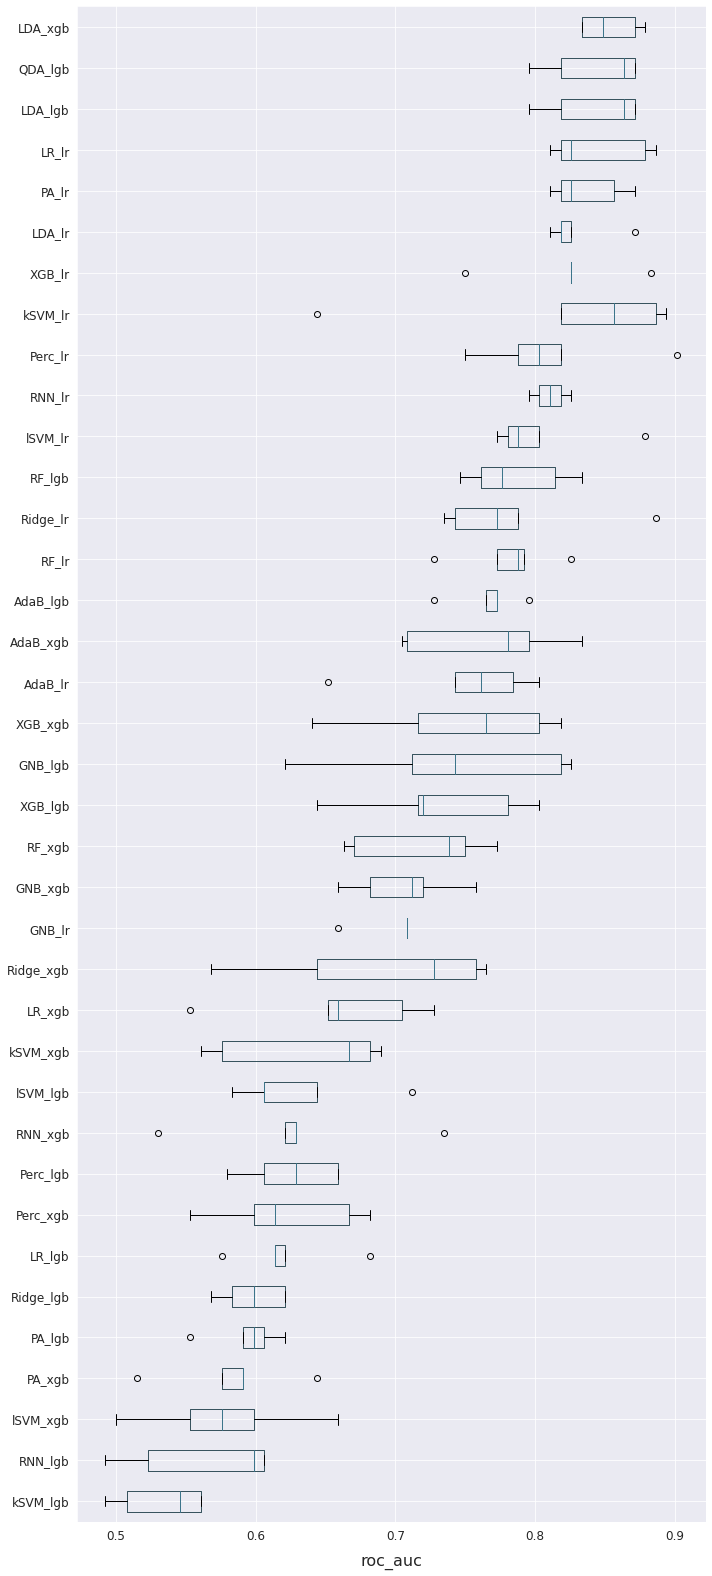

In [3]:
atom.plot_results()

In [16]:
atom.save("atom_sfm_xgb_lgb_lr", save_data=True)

ATOMClassifier successfully saved.


In [ ]:
from atom import ATOMLoader

atom = ATOMLoader("atom_sfm_xgb_lgb_lr", verbose=2)

In [137]:
atom.results.sort_values(by=['mean_bootstrap'], ascending=False)

,metric_bo,time_bo,metric_train,metric_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
LDA_xgb,0.987654,2m:16s,0.930502,0.840909,0.014s,0.853030,0.018924,0.897s,2m:16s
QDA_lgb,0.975309,1m:16s,0.911969,0.871212,0.013s,0.843939,0.031272,0.040s,1m:16s
LDA_lgb,0.975309,1m:28s,0.912741,0.871212,0.013s,0.843939,0.031272,0.044s,1m:28s
LR_lr,1.000000,2m:39s,0.942085,0.840909,0.032s,0.843939,0.031998,0.113s,2m:39s
PA_lr,1.000000,2m:02s,0.937452,0.825758,0.022s,0.836364,0.023276,0.080s,2m:02s
LDA_lr,0.987654,1m:32s,0.931274,0.818182,0.015s,0.828788,0.021747,0.042s,1m:32s
XGB_lr,1.000000,5m:12s,0.961004,0.765152,0.269s,0.821970,0.042180,0.506s,5m:13s
kSVM_lr,1.000000,2m:31s,0.917375,0.886364,0.035s,0.819697,0.091839,0.088s,2m:31s
Perc_lr,1.000000,2m:29s,0.926641,0.787879,0.023s,0.812121,0.050115,0.078s,2m:29s
RNN_lr,1.000000,2m:15s,0.994595,0.825758,0.026s,0.810606,0.010714,0.082s,2m:15s


In [3]:
atom.winner

Linear Discriminant Analysis
 --> Estimator: LinearDiscriminantAnalysis
 --> Evaluation: roc_auc: 0.853

In [4]:
atom.winner.best_params

{'solver': 'lsqr', 'shrinkage': 0.5}

In [75]:
atom.winner.estimator.coef_

array([[-256.50457087,  -66.20771163,   -4.18246707, -114.53784663,
         -13.16630291,   -7.01780106, -959.34561121,  109.69540858,
         -75.05631247,  -10.21809074]])

In [141]:
atom.winner.results.to_frame().T

,metric_bo,time_bo,metric_train,metric_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
LDA_xgb,0.987654,2m:16s,0.930502,0.840909,0.014s,0.85303,0.018924,0.897s,2m:16s


In [144]:
atom.winner.evaluate().to_frame().T

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
LDA_xgb,0.565217,0.841032,0.583333,0.6875,0.52381,0.295468,0.52381,1.0,0.840909


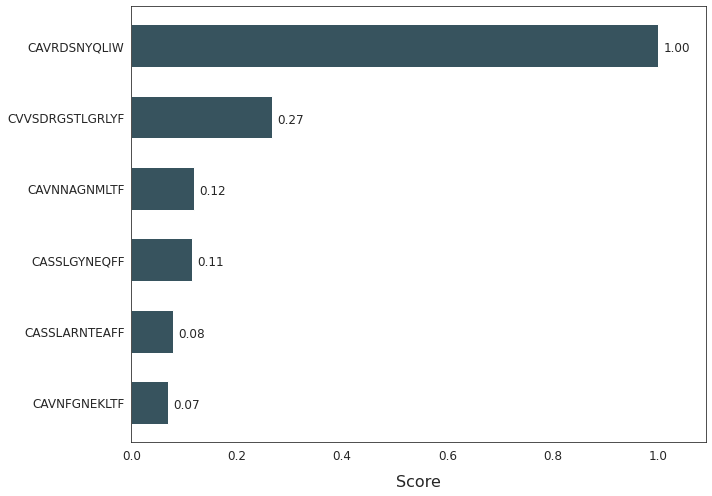

In [5]:
atom.winner.plot_feature_importance(show=6, display = None)

In [7]:
from numpy import sqrt
from numpy import argmax
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt

In [8]:

# keep probabilities for the positive outcome only
yhat = atom.winner.predict_proba_test[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(atom.y_test, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.653083


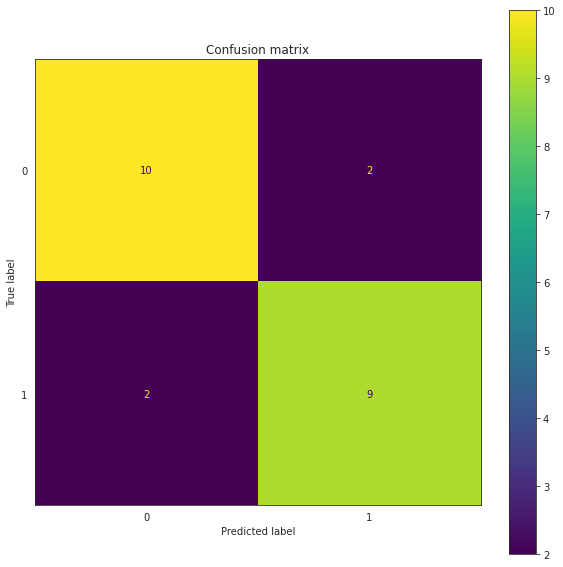

<Figure size 432x288 with 0 Axes>

In [23]:
y_pred = (yhat >= best_thresh).astype('float')
cm = confusion_matrix(atom.y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')

plt.grid(False)
plt.title('Confusion matrix')
plt.show()

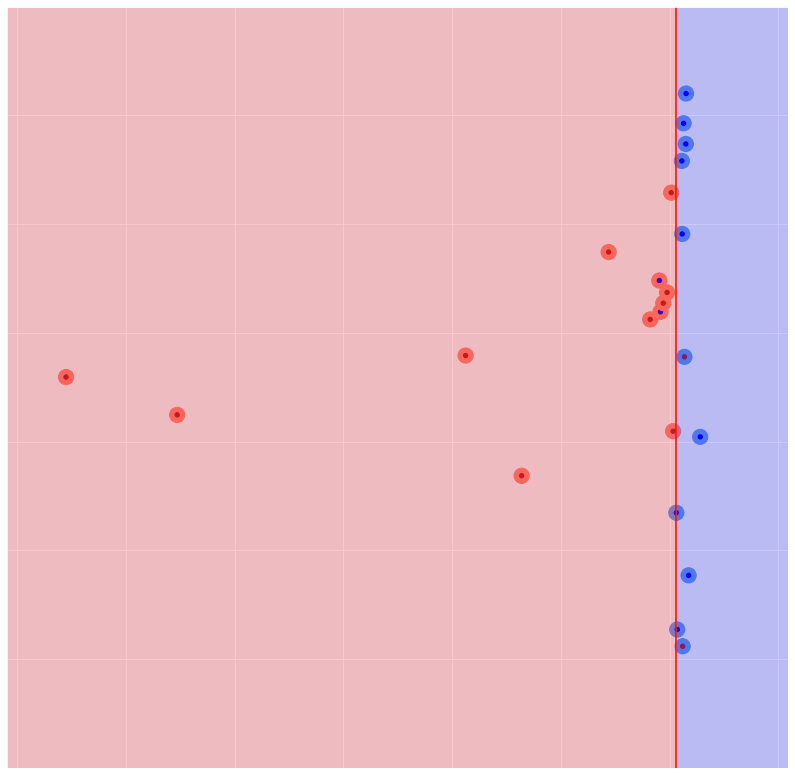

In [102]:
from matplotlib import pyplot as plt, patches
from random import sample
plt.rcParams["figure.figsize"] = [14.0, 14.0]

x = yhat
y = sample(range(4000, 6650), len(x))
y = [t/10000 for t in y]
real = atom.y_test.to_list()

ax = plt.gca()

for i in range(len(x)):
    # predicted positive- blue
    # predicted negative- red
    circle = plt.Circle((x[i], y[i]), 0.0035, color = 'salmon' if x[i] < best_thresh else 'cornflowerblue')
    ax.add_patch(circle)
    # actualy positive- blue
    # actualy negative- red
    incircle = plt.Circle((x[i], y[i]), 0.001, color='firebrick' if real[i] == 0 else 'blue')
    ax.add_patch(incircle)

ax.axis("equal")
plt.xlim(0.35, 0.7)
plt.ylim(0.35,0.7)
plt.axvline(x=best_thresh, color='red', linestyle='-')
ax.axvspan(0, best_thresh, facecolor='red', alpha=0.2)
ax.axvspan(best_thresh, 0.8, facecolor='blue', alpha=0.2)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()